# IMPORT MODULES

In [3]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.3 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

In [5]:
!pip install keras

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from transformers.models.bert.modeling_bert import BertModel,BertForMaskedLM

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load your sentiment dataset (e.g., from a CSV file)
data = pd.read_csv('Tweets.csv')

 # DATA PREPROCESSING

In [9]:
texts = [[word.lower() for word in text.split()] for text in data]

In [10]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


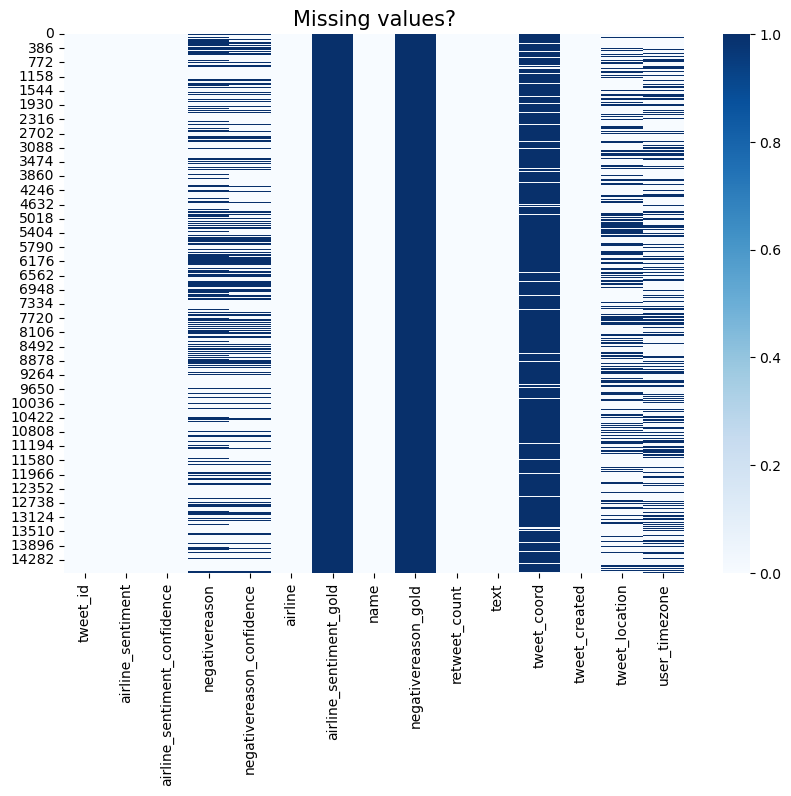

In [ ]:
#Visualization of missing value using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(), cmap = "Blues")
plt.title("Missing values?", fontsize = 15)
plt.show()

In [ ]:
print("Percentage null or na values in data")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in data


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [ ]:
data.drop(["tweet_coord", "airline_sentiment_gold", "negativereason_gold"], axis=1, inplace=True)

In [ ]:
freq = data.groupby("negativereason").size()

In [ ]:
data.duplicated().sum()

39

In [ ]:
# Dropping duplicates
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# EXPLORATORY DATA ANALYSIS

In [ ]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

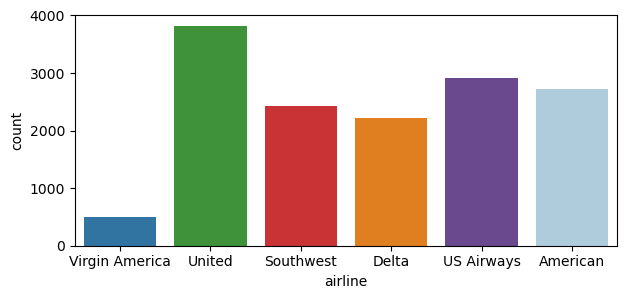

In [ ]:
# Checking the distribution of airlines
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

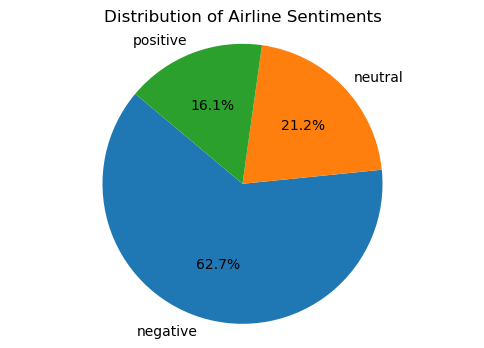

In [ ]:
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


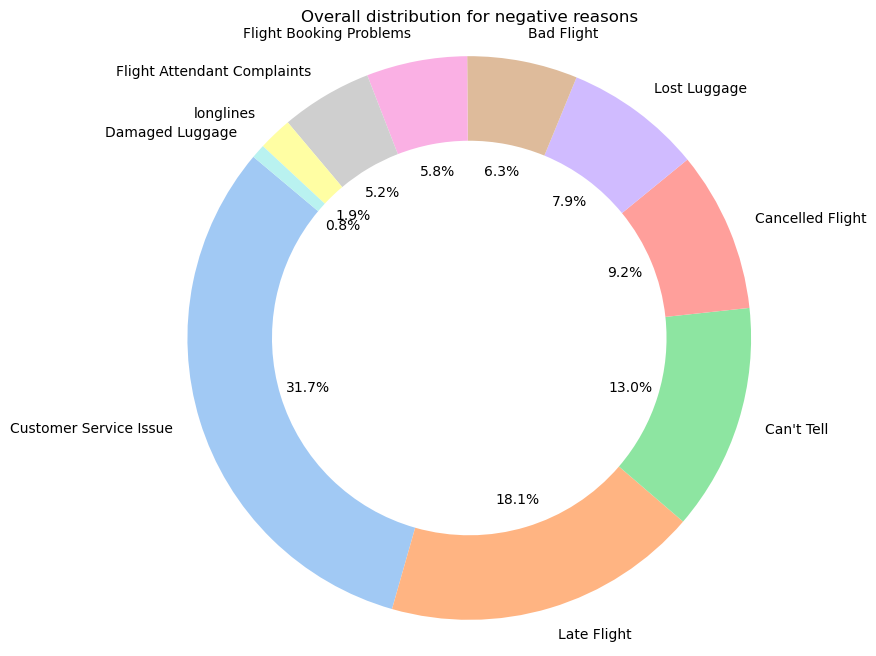

In [ ]:
# Calculate the value counts for each negative reason
value_counts = data['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors for the chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

In [10]:
# Select only the necessary columns for sentiment analysis
data = data[['airline_sentiment', 'text']].copy()
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


# TRAINING THE MODEL

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


# Tokenize the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])

# Pad the sequences to the same length
X = pad_sequences(tokenizer.texts_to_sequences(data['text']), maxlen=256)

# Encode the target labels as integers (0 for Negative, 1 for Neutral, 2 for Positive)
y = data['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the model architecture


In [18]:
from keras.layers import Bidirectional, Embedding, LSTM, Dense
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Remove kernel_regularizer
model.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # Apply kernel_regularizer here
model.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))  # Apply kernel_regularizer here
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, batch_size=64)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/12
96/96 [==============================] - 123s 1s/step - loss: 3.7278 - accuracy: 0.5963
Epoch 2/12
96/96 [==============================] - 116s 1s/step - loss: 0.7677 - accuracy: 0.6941
Epoch 3/12
96/96 [==============================] - 117s 1s/step - loss: 0.5723 - accuracy: 0.7572
Epoch 4/12
96/96 [==============================] - 116s 1s/step - loss: 0.5085 - accuracy: 0.8011
Epoch 5/12
96/96 [==============================] - 117s 1s/step - loss: 0.5083 - accuracy: 0.8102
Epoch 6/12
96/96 [==============================] - 118s 1s/step - loss: 0.4177 - accuracy: 0.8510
Epoch 7/12
96/96 [==============================] - 117s 1s/step - loss: 0.3585 - accuracy: 0.8792
Epoch 8/12
96/96 [==============================] - 117s 1s/step - loss: 0.3648 - accuracy: 0.8855
Epoch 9/12
96/96 [==============================] - 117s 1s/step - loss: 0.3315 - accuracy: 0.9014
Epoch 10/12
96/96 [==============================] - 117s 1s/step - loss: 0.3308 - accuracy: 0.9051
Epoch 11/

In [21]:
# Make a prediction
new_tweet = [
            "The service @americanair is not bad"
            ]
X_new = pad_sequences(tokenizer.texts_to_sequences([new_tweet]), maxlen=256)
prediction = model.predict(X_new)

# Get the predicted sentiment
predicted_sentiment = np.argmax(prediction)

# Print the prediction
if predicted_sentiment == 0:
    print("Predicted sentiment: Negative")
elif predicted_sentiment == 1:
    print("Predicted sentiment: Neutral")
elif predicted_sentiment == 2:
    print("Predicted sentiment: Positive")


1/1 [==============================] - 0s 56ms/step
Predicted sentiment: Neutral
